In [312]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


# Import Packages

In [313]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

<h1>About Dataset</h1>
<h1>Adult Income</h1>
<h3>
This dataset aims to predict an individual's income level based on demographic and personal features. It comprises 16 columns, including a target field ("Income") with two classes: <=50K and >50K. There are 14 attributes such as education level, age, gender, and occupation. It's commonly used for KNN</h3>

In [314]:
data = pd.read_csv("adult.csv")
data.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [315]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,48842.0,38.643585,13.710510,17.0,28.0,37.0,48.0,90.0
fnlwgt,48842.0,189664.134597,105604.025423,12285.0,117550.5,178144.5,237642.0,1490400.0
educational-num,48842.0,10.078089,2.570973,1.0,9.0,10.0,12.0,16.0
capital-gain,48842.0,1079.067626,7452.019058,0.0,0.0,0.0,0.0,99999.0
capital-loss,48842.0,87.502314,403.004552,0.0,0.0,0.0,0.0,4356.0
hours-per-week,48842.0,40.422382,12.391444,1.0,40.0,40.0,45.0,99.0


In [316]:
print(data.shape)

(48842, 15)


In [317]:
data.isin(['?']).sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

#### Replacing ? with Nan 

In [318]:
data['workclass']=data['workclass'].replace('?',np.nan)
data['occupation']=data['occupation'].replace('?',np.nan)
data['native-country']=data['native-country'].replace('?',np.nan)

In [319]:
data

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [320]:
# Check For Missing Values
info = pd.DataFrame(data.isnull().sum(),columns=["IsNull"])
info.insert(1,"IsNa",data.isna().sum(),True)
info.insert(2,"Duplicate",data.duplicated().sum(),True)
info.insert(3,"Unique",data.nunique(),True)
numeric_data = data.apply(pd.to_numeric, errors='coerce')
min_values = numeric_data.min()
max_values = numeric_data.max()

info.insert(4, "Min", min_values, True)
info.insert(5,"Max",max_values,True)
info.T  

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
IsNull,0.0,2799.0,0.0,0.0,0.0,0.0,2809.0,0.0,0.0,0.0,0.0,0.0,0.0,857.0,0.0
IsNa,0.0,2799.0,0.0,0.0,0.0,0.0,2809.0,0.0,0.0,0.0,0.0,0.0,0.0,857.0,0.0
Duplicate,52.0,52.0,52.0,52.0,52.0,52.0,52.0,52.0,52.0,52.0,52.0,52.0,52.0,52.0,52.0
Unique,74.0,8.0,28523.0,16.0,16.0,7.0,14.0,6.0,5.0,2.0,123.0,99.0,96.0,41.0,2.0
Min,17.0,NaN,12285.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,NaN,NaN
Max,90.0,NaN,1490400.0,NaN,16.0,NaN,NaN,NaN,NaN,NaN,99999.0,4356.0,99.0,NaN,NaN


results:
1. no null or Nan Value.but the dataset is not using the default nan string for missing values, instead "?" is used. after convert '?' to Nan three columns ['workclass','occupation','native-country] have nan
2. there are 52 duplicated row.


In [321]:
df = data.copy()

## Remove nan value

In [322]:
df.dropna(how='any',inplace=True)
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [323]:
df.shape

(45222, 15)

## Remove Duplicated

In [324]:
df = df.drop_duplicates()
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


# remove educational-num

#### Check 'education' & 'educational-num' columns

In [325]:
df['education'].unique()

array(['11th', 'HS-grad', 'Assoc-acdm', 'Some-college', '10th',
       'Prof-school', '7th-8th', 'Bachelors', 'Masters', '5th-6th',
       'Assoc-voc', '9th', 'Doctorate', '12th', '1st-4th', 'Preschool'],
      dtype=object)

In [326]:
df['educational-num'].unique()

array([ 7,  9, 12, 10,  6, 15,  4, 13, 14,  3, 11,  5, 16,  8,  2,  1],
      dtype=int64)

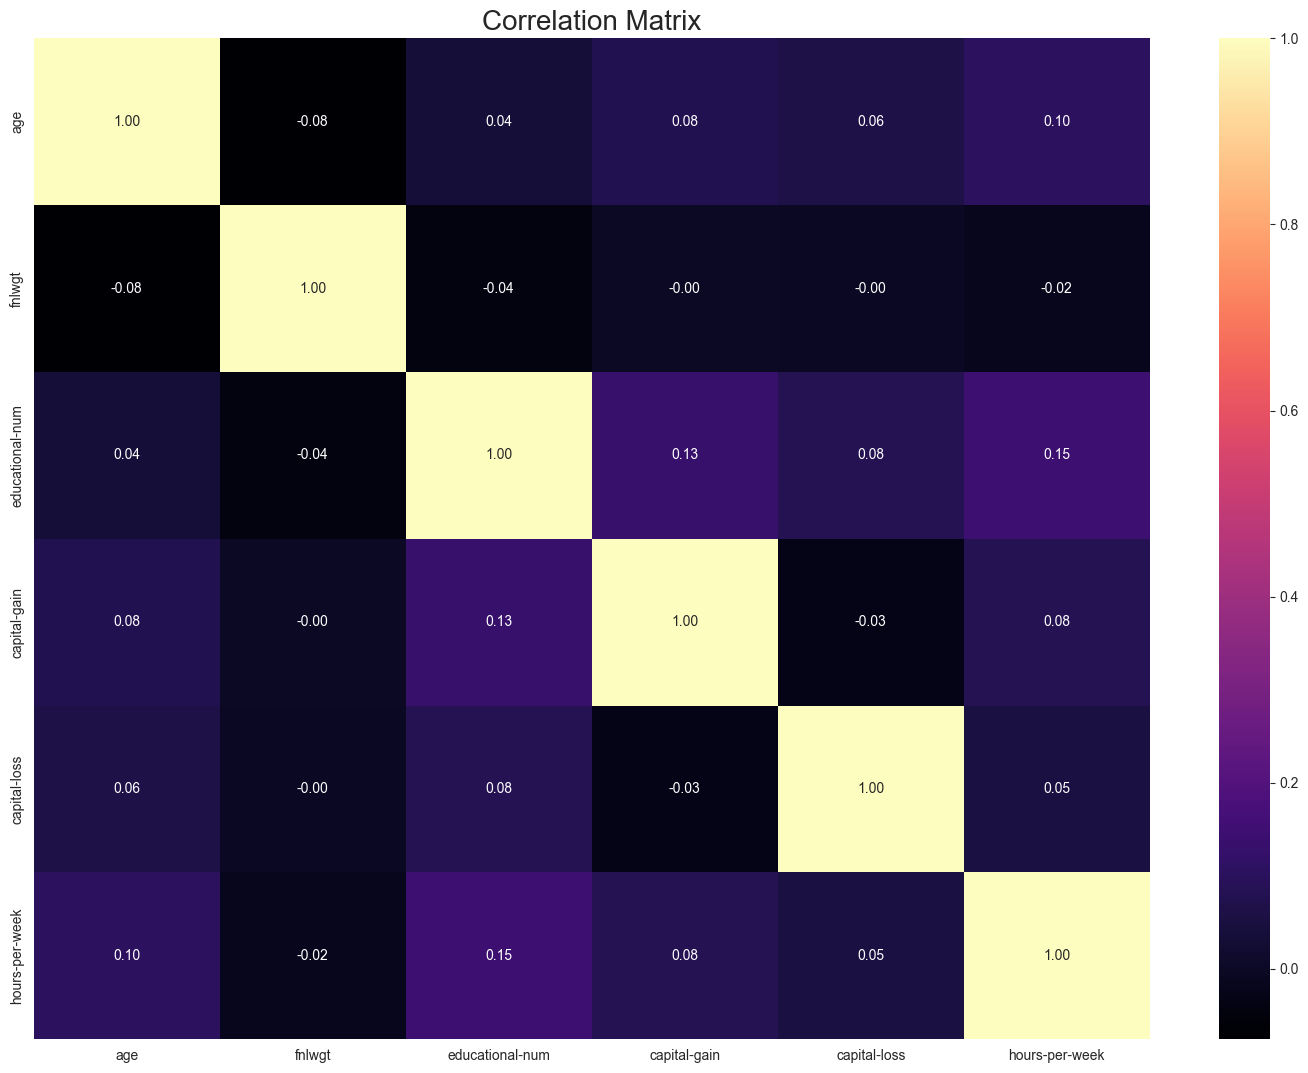

In [327]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter numerical columns
numerical_columns = df.select_dtypes(include=['int', 'float']).columns

# Create correlation matrix for numerical columns only
corr_matrix = df[numerical_columns].corr()

# Plot correlation matrix
plt.figure(figsize=[18, 13])
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="magma")
plt.title("Correlation Matrix", fontsize=20)
plt.show()


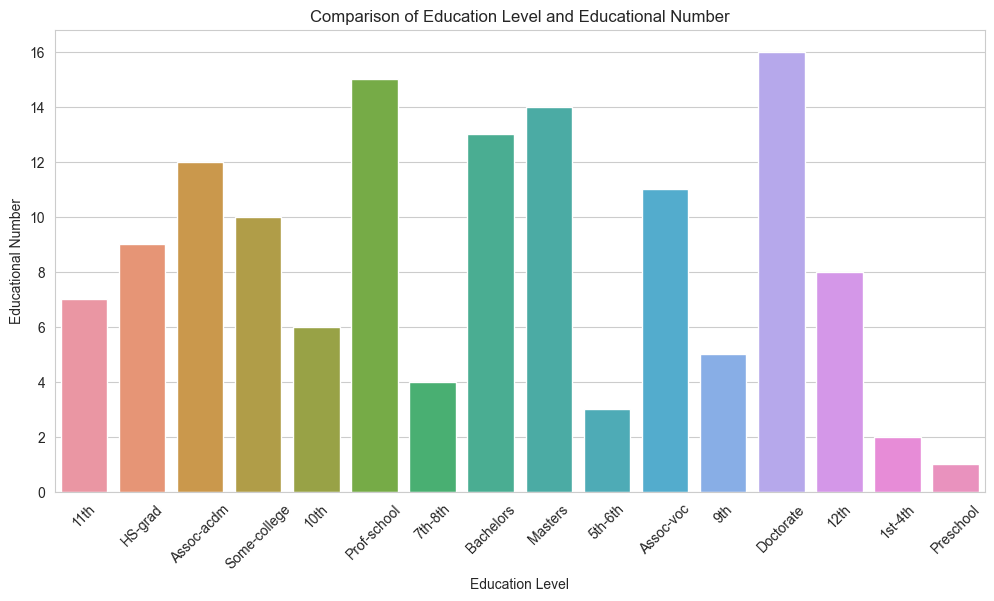

In [328]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame containing the dataset

# Set figure size
plt.figure(figsize=(12, 6))

# Create bar plot
sns.barplot(x='education', y='educational-num', data=df)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add labels and title
plt.xlabel('Education Level')
plt.ylabel('Educational Number')
plt.title('Comparison of Education Level and Educational Number')

# Show plot
plt.show()


Education level is enough, we remove the Education number

In [329]:
df1 = df.drop(['educational-num'], axis=1)

In [330]:
import seaborn as sns
def plot_outliers(df):

    numerical_columns = df.select_dtypes(include=['number']).columns

    num_cols = len(numerical_columns)
    plt.figure(figsize=(20, 3*num_cols))

    for i, column in enumerate(numerical_columns):
        plt.subplot(num_cols, 1, i+1)
        sns.boxplot(data=df[column],orient='h')
        plt.title(f'Boxplot of {column}')
        plt.xlabel('Values')
        plt.ylabel(column)

    plt.tight_layout()
    plt.show()

In [331]:
def plot_outliers_summary(df):
    plt.figure(figsize=(15, 8))
    # Create boxplots using Seaborn in one line
    sns.boxplot(data=df, orient='v')
    warnings.filterwarnings("ignore", category=FutureWarning)

    # Show the plot
    plt.show()

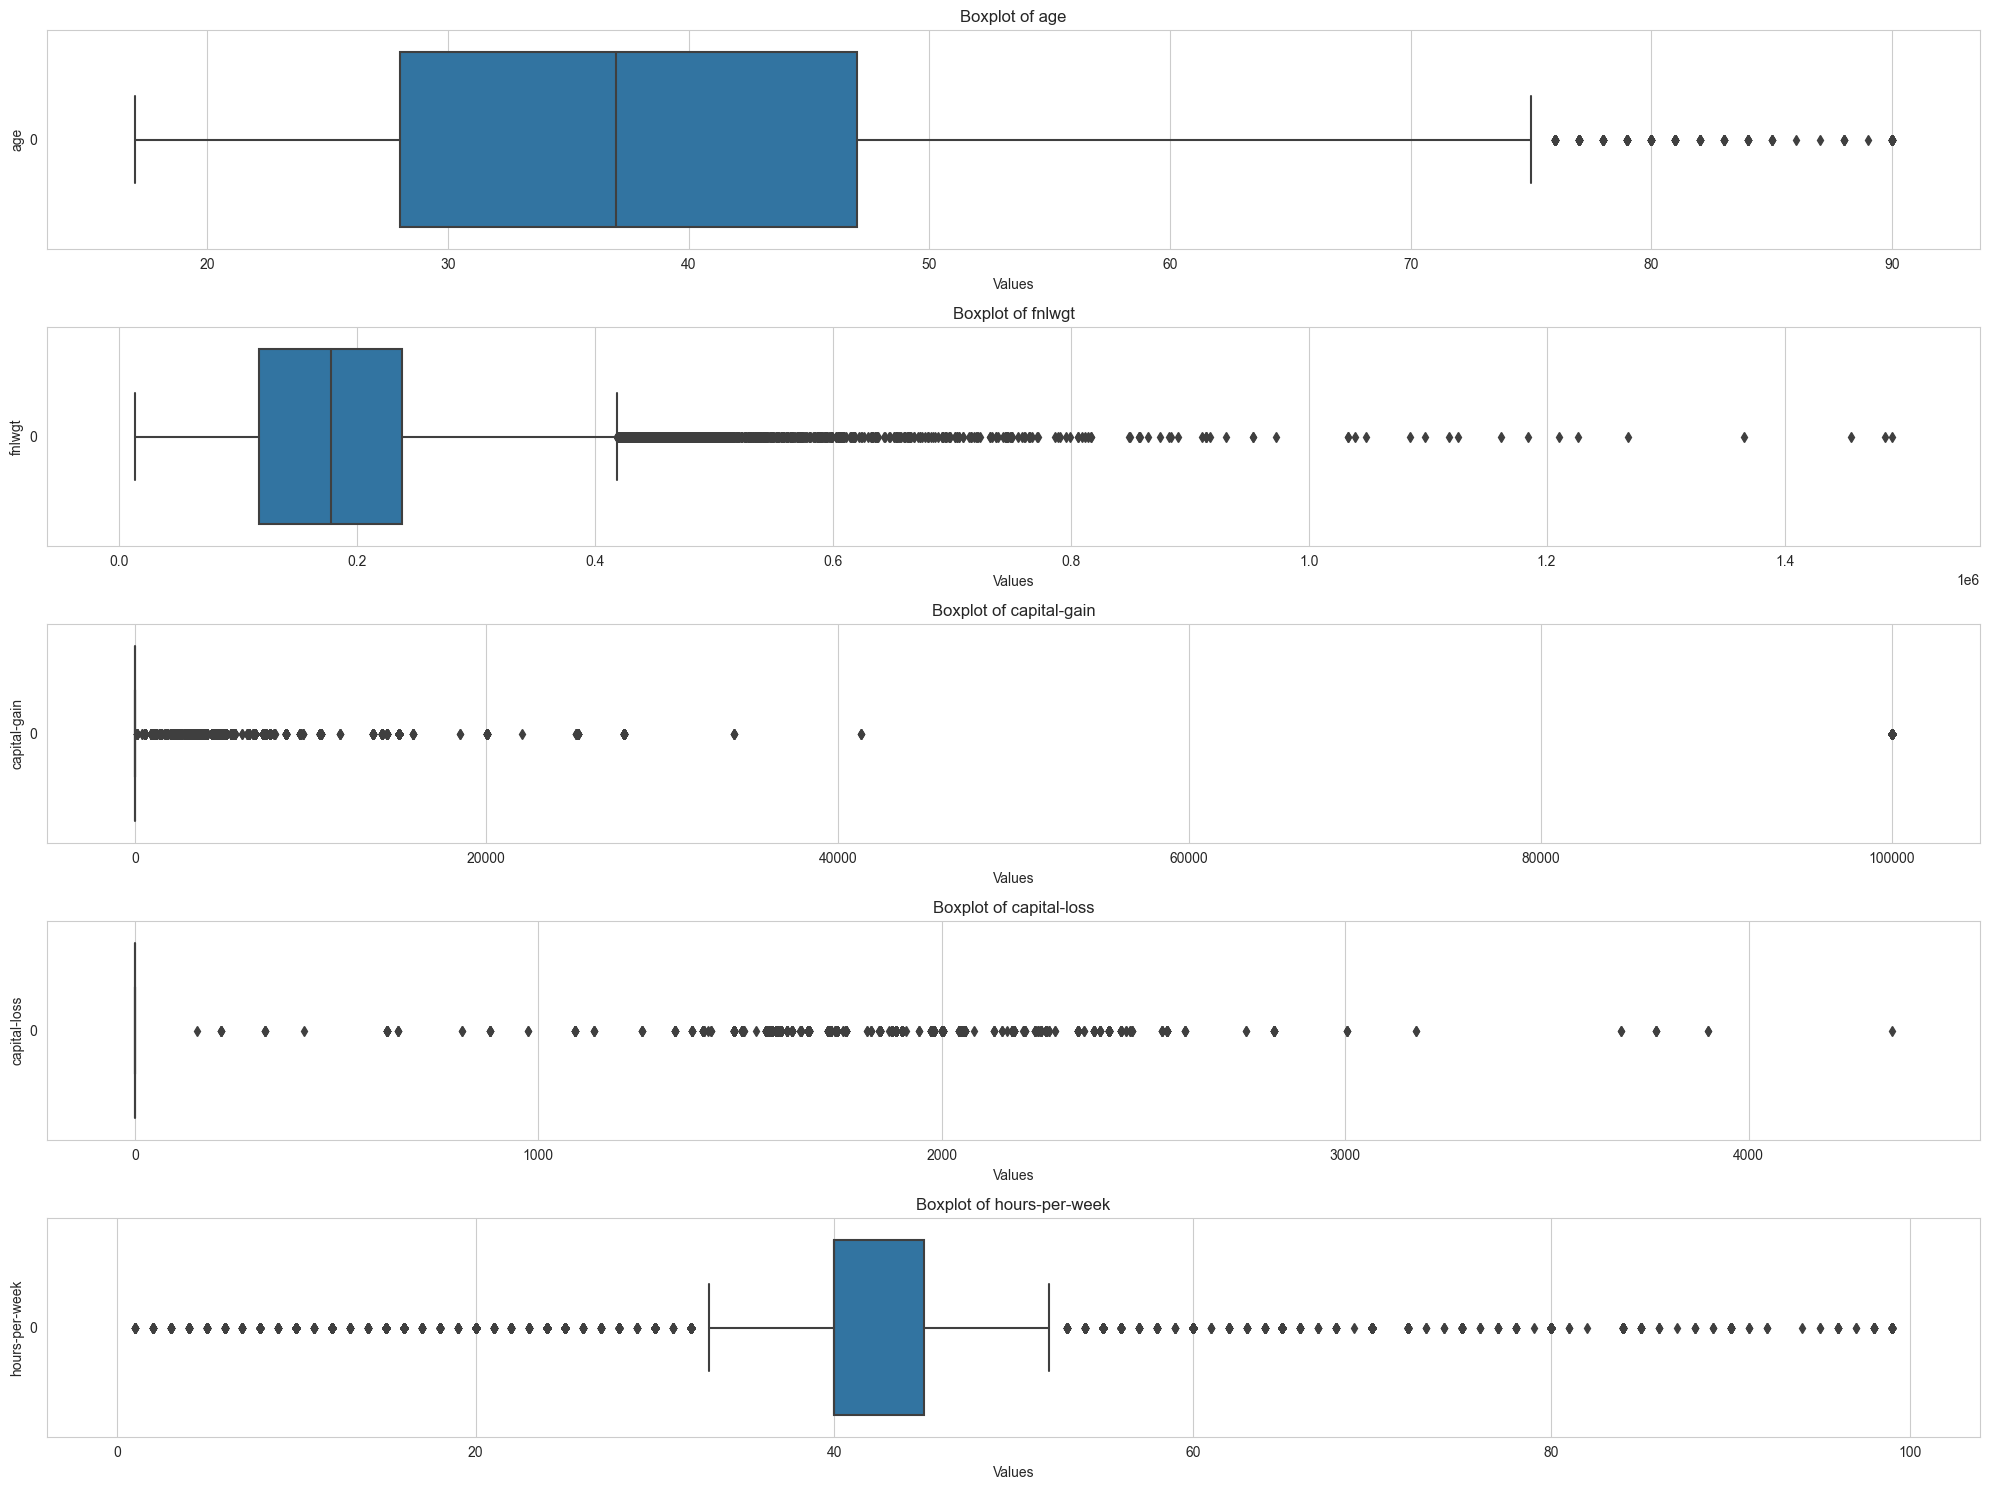

In [332]:
plot_outliers(df1)


In [333]:
def remove_outliers(cols,dataframe):
    bounds = {}
    new_df = dataframe.copy()
    for col in cols:
        Q1 = new_df[col].quantile(0.25)
        Q3 = new_df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        bounds[col] = (lower_bound, upper_bound)

    # Remove rows with outliers
    for col in cols:
        lower_bound, upper_bound = bounds[col]
        new_df = new_df[(new_df[col] >= lower_bound) & (new_df[col] <= upper_bound)]

    # Reset the index of the data
    new_df.reset_index(drop=True, inplace=True)
    return new_df

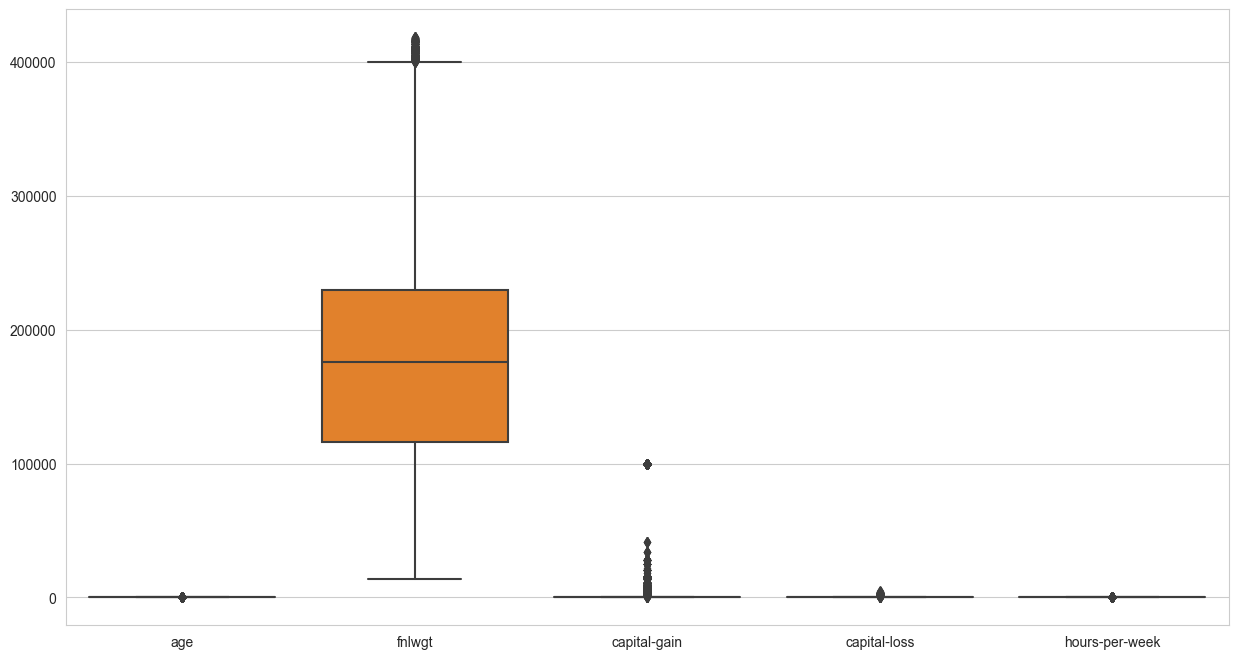

In [334]:
cols = ['fnlwgt']

df1 = remove_outliers(cols, df1)
plot_outliers_summary(df1)

### Convert categorical cate to numerical using LableEncoder

In [335]:
from sklearn import preprocessing

In [336]:
label_encoder = preprocessing.LabelEncoder()

df1['gender'] = label_encoder.fit_transform(df1['gender'])
df1['workclass'] = label_encoder.fit_transform(df1['workclass'])
df1['education'] = label_encoder.fit_transform(df1['education'])
df1['marital-status'] = label_encoder.fit_transform(df1['marital-status'])
df1['occupation'] = label_encoder.fit_transform(df1['occupation'])
df1['relationship'] = label_encoder.fit_transform(df1['relationship'])
df1['race'] = label_encoder.fit_transform(df1['race'])
df1['native-country'] = label_encoder.fit_transform(df1['native-country'])
df1['income'] = label_encoder.fit_transform(df1['income'])

In [337]:
df1

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,2,226802,1,4,6,3,2,1,0,0,40,38,0
1,38,2,89814,11,2,4,0,4,1,0,0,50,38,0
2,28,1,336951,7,2,10,0,4,1,0,0,40,38,1
3,44,2,160323,15,2,6,0,2,1,7688,0,40,38,1
4,34,2,198693,0,4,7,1,4,1,0,0,30,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43838,27,2,257302,7,2,12,5,4,0,0,0,38,38,0
43839,40,2,154374,11,2,6,0,4,1,0,0,40,38,1
43840,58,2,151910,11,6,0,4,4,0,0,0,40,38,0
43841,22,2,201490,11,4,0,3,4,1,0,0,20,38,0


In [338]:
# Check For Missing Values
info = pd.DataFrame(df1.isnull().sum(),columns=["IsNull"])
info.insert(1,"IsNa",df1.isna().sum(),True)
info.insert(2,"Duplicate",df1.duplicated().sum(),True)
info.insert(3,"Unique",df1.nunique(),True)
info.insert(4,"Min",df1.min(),True)
info.insert(5,"Max",df1.max(),True)
info.T    


,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
IsNull,0,0,0,0,0,0,0,0,0,0,0,0,0,0
IsNa,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Duplicate,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Unique,74,7,25677,16,7,14,6,5,2,121,97,96,41,2
Min,17,0,13492,0,0,0,0,0,0,0,0,1,0,0
Max,90,6,418645,15,6,13,5,4,1,99999,4356,99,40,1


In [339]:
def diagnostic_plots(df, variable,target):
    # The function takes a dataframe (df) and
    # the variable of interest as arguments.

    # Define figure size.
    plt.figure(figsize=(20, 7))

    # histogram
    plt.subplot(1, 4, 1)
    sns.histplot(df[variable], kde = True,color='r')
    plt.title('Histogram')


    # scatterplot
    plt.subplot(1, 4, 2)
    plt.scatter(df[variable],df[target],color = 'g')
    plt.title('Scatterplot')
    
    
    # boxplot
    plt.subplot(1, 4, 3)
    sns.boxplot(y=df[variable],color = 'b')
    plt.title('Boxplot')
    
    # barplot
    plt.subplot(1, 4, 4)
    sns.barplot(x = target, y = variable, data = df)   
    plt.title('Barplot')
    
    
    plt.show()

# Model

In [340]:
from sklearn.model_selection import train_test_split
# KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score 
from sklearn import metrics

In [341]:
# split Data
X = df1.drop(columns={"income"},axis=1)
y =df1["income"].values.reshape(-1,1) #target

In [349]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (30690, 13)
y_train shape: (30690, 1)
X_test shape: (13153, 13)
y_test shape: (13153, 1)


In [351]:
# Save training and testing sets
pd.DataFrame(X_train).to_csv("train.csv", index=False)
pd.DataFrame(X_test).to_csv("test.csv", index=False)
pd.DataFrame(y_train).to_csv("train_labels.csv", index=False)
pd.DataFrame(y_test).to_csv("test_labels.csv", index=False)

### Scaling Data

In [343]:
from sklearn.preprocessing import MinMaxScaler

st =MinMaxScaler()
X_train = st.fit_transform(X_train)
X_test = st.fit_transform(X_test)

<h1>1- KNN</h1>

In [344]:
#Find Best K 
K = 20
error =[]
accuracy=[]
for i in range(1,K+1):
    knn= KNeighborsClassifier(n_neighbors= i)
    knn.fit(X_train,y_train)
    y_pred =knn.predict(X_test)
    error.append(1-metrics.accuracy_score(y_test,y_pred))
    accuracy.append(metrics.accuracy_score(y_test,y_pred))


<h1>2- Desision Tree</h1>
<h1>3- Random Forest</h1>
<h1>4- SVM</h1>

In [345]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Create classifiers
K=20
knn_classifier= KNeighborsClassifier(K)
decision_tree_classifier = DecisionTreeClassifier()
random_forest_classifier = RandomForestClassifier()
svm_classifier = SVC()

# Train classifiers
knn_classifier.fit(X_train,y_train)
decision_tree_classifier.fit(X_train, y_train)
random_forest_classifier.fit(X_train, y_train)
svm_classifier.fit(X_train, y_train)

# Predictions
knn_pred =knn_classifier.predict(X_test)
decision_tree_pred = decision_tree_classifier.predict(X_test)
random_forest_pred = random_forest_classifier.predict(X_test)
svm_pred = svm_classifier.predict(X_test)


In [346]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Calculate evaluation metrics for KNN
knn_accuracy = metrics.accuracy_score(y_test, knn_pred)
knn_precision = metrics.precision_score(y_test, knn_pred)
knn_recall = metrics.recall_score(y_test, knn_pred)
knn_f1_score = metrics.f1_score(y_test, knn_pred)

# Calculate evaluation metrics for Decision Tree
decision_tree_accuracy = accuracy_score(y_test, decision_tree_pred)
decision_tree_precision = precision_score(y_test, decision_tree_pred)
decision_tree_recall = recall_score(y_test, decision_tree_pred)
decision_tree_f1_score = f1_score(y_test, decision_tree_pred)

# Calculate evaluation metrics for Random Forest
random_forest_accuracy = accuracy_score(y_test, random_forest_pred)
random_forest_precision = precision_score(y_test, random_forest_pred)
random_forest_recall = recall_score(y_test, random_forest_pred)
random_forest_f1_score = f1_score(y_test, random_forest_pred)

# Calculate evaluation metrics for SVM
svm_accuracy = accuracy_score(y_test, svm_pred)
svm_precision = precision_score(y_test, svm_pred)
svm_recall = recall_score(y_test, svm_pred)
svm_f1_score = f1_score(y_test, svm_pred)


In [347]:
# Format the metrics to two decimal points

knn_accuracy_str = "{:.0f} %".format(float("{:.2f}".format(knn_accuracy)) * 100)
knn_precision_str = "{:.0f}%".format(knn_precision * 100)
knn_recall_str = "{:.0f}%".format(knn_recall * 100)
knn_f1_score_str = "{:.0f}%".format(knn_f1_score * 100)


decision_tree_accuracy = "{:.0f} %".format(float("{:.2f}".format(decision_tree_accuracy)) * 100)
decision_tree_precision = "{:.0f} %".format(float("{:.2f}".format(decision_tree_precision)) * 100)
decision_tree_recall = "{:.0f} %".format(float("{:.2f}".format(decision_tree_recall)) * 100)
decision_tree_f1_score = "{:.0f} %".format(float("{:.2f}".format(decision_tree_f1_score)) * 100)

random_forest_accuracy = "{:.0f} %".format(float("{:.2f}".format(random_forest_accuracy)) * 100)
random_forest_precision = "{:.0f} %".format(float("{:.2f}".format(random_forest_precision)) * 100)
random_forest_recall = "{:.0f} %".format(float("{:.2f}".format(random_forest_recall)) * 100)
random_forest_f1_score = "{:.0f} %".format(float("{:.2f}".format(random_forest_f1_score)) * 100)

svm_accuracy = "{:.0f} %".format(float("{:.2f}".format(svm_accuracy)) * 100)
svm_precision = "{:.0f} %".format(float("{:.2f}".format(svm_precision)) * 100)
svm_recall = "{:.0f} %".format(float("{:.2f}".format(svm_recall)) * 100)
svm_f1_score = "{:.0f} %".format(float("{:.2f}".format(svm_f1_score)) * 100)


# Print the metrics with two decimal points
# Print the metrics formatted as percentages with one decimal point for KNN
print("KNN Classifier:")
print("Accuracy:", knn_accuracy_str)
print("Precision:", knn_precision_str)
print("Recall:", knn_recall_str)
print("F1-Score:", knn_f1_score_str)
print()


print("Decision Tree Classifier:")
print("Accuracy:", decision_tree_accuracy)
print("Precision:", decision_tree_precision)
print("Recall:", decision_tree_recall)
print("F1-Score:", decision_tree_f1_score)
print()

print("Random Forest Classifier:")
print("Accuracy:", random_forest_accuracy)
print("Precision:", random_forest_precision)
print("Recall:", random_forest_recall)
print("F1-Score:", random_forest_f1_score)
print()

print("SVM Classifier:")
print("Accuracy:", svm_accuracy)
print("Precision:", svm_precision)
print("Recall:", svm_recall)
print("F1-Score:", svm_f1_score)


KNN Classifier:
Accuracy: 82 %
Precision: 68%
Recall: 51%
F1-Score: 58%

Decision Tree Classifier:
Accuracy: 78 %
Precision: 55 %
Recall: 55 %
F1-Score: 55 %

Random Forest Classifier:
Accuracy: 85 %
Precision: 72 %
Recall: 60 %
F1-Score: 66 %

SVM Classifier:
Accuracy: 81 %
Precision: 76 %
Recall: 35 %
F1-Score: 48 %
